In [1]:
# import classes for Data Analysis
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# import classes for colors and front
from colorama import Fore,Style

# import classes for data visulation
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn           as sns
sns.set()

# import classes for widgets creation
from ipywidgets      import HBox,Output,VBox,Layout
from IPython.display import display
import ipywidgets as widgets
    
# import classes for data split
from sklearn.model_selection import train_test_split

# import classes for Feature engineering (encoding & standardization)
from sklearn.preprocessing import StandardScaler,MinMaxScaler


# import classes for Feature Selection
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

# import classes for Classification Model Training
from sklearn.linear_model   import LogisticRegression
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.naive_bayes    import GaussianNB
from sklearn.svm            import SVC
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost                import XGBClassifier,XGBRegressor
from catboost               import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes    import ComplementNB

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,\
                            precision_score, recall_score, roc_curve,\
                            roc_auc_score, plot_roc_curve, plot_precision_recall_curve

# import classes for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# import classes for Evaluating the Model Performance
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score,precision_score,f1_score,classification_report,plot_confusion_matrix, plot_roc_curve,plot_precision_recall_curve,log_loss,brier_score_loss,hamming_loss

import warnings
warnings.filterwarnings("ignore")

SEED = 41

In [2]:
import imblearn
print(imblearn.__version__)

0.8.0


In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, cross_validate

In [4]:
data = pd.read_csv("framingham.csv")
data.sort_values("age").head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2365,0,32,2.0,1,15.0,0.0,0,0,0,242.0,111.0,70.0,29.84,80.0,88.0,0
1353,1,33,2.0,0,0.0,0.0,0,1,0,165.0,141.5,95.0,26.74,54.0,77.0,0
3064,1,33,4.0,0,0.0,0.0,0,0,0,165.0,136.0,75.0,24.95,88.0,90.0,0
1313,0,33,1.0,0,0.0,0.0,0,0,0,158.0,108.0,67.0,19.84,86.0,69.0,0
440,0,33,3.0,1,15.0,0.0,0,0,0,199.0,116.0,81.0,21.61,75.0,93.0,0


In [5]:
data.sort_values("age").tail()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3048,0,69,2.0,0,0.0,0.0,0,1,0,215.0,164.0,80.0,17.23,100.0,NaN,0
3278,1,69,1.0,1,4.0,0.0,0,1,0,232.0,151.0,74.0,24.14,75.0,62.0,0
4158,0,69,2.0,0,0.0,1.0,0,1,0,220.0,143.0,81.0,26.27,60.0,77.0,0
3137,0,70,2.0,0,0.0,1.0,0,1,0,231.0,136.0,84.0,31.78,60.0,95.0,0
1624,0,70,1.0,0,0.0,0.0,1,1,0,107.0,143.0,93.0,NaN,68.0,62.0,1


In [9]:
data_eda = data.copy()
data_eda["sex"]              = data["sex"].map({1: "Male", 0: "Female"})
data_eda['currentSmoker']    = data['currentSmoker'].map({1:'Yes', 0:'No'})
data_eda['BPMeds']           = data['BPMeds'].map({1:'No', 0:'Yes'})
data_eda['prevalentStroke']  = data['prevalentStroke'].map({1:'Stroke+', 0:'Normal'})
data_eda['prevalentHyp']     = data['prevalentHyp'].map({1:'Hypertensive', 0:'Normal'})
data_eda['diabetes']         = data['diabetes'].map({1:'Yes', 0:'No'})
data_eda['TenYearCHD']       = data['TenYearCHD'].map({1:'Yes', 0:'No'})

In [14]:
data.isnull().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
print("Ratio of Target Values  :",data_eda["TenYearCHD"].value_counts()[1]/data_eda["TenYearCHD"].value_counts()[0])
print("\n")
print("Prediction of Cardio Vascular Disease\n_____________________________________")
data_eda["TenYearCHD"].value_counts()

Ratio of Target Values  : 0.1791875347801892


Prediction of Cardio Vascular Disease
_____________________________________


No     3594
Yes     644
Name: TenYearCHD, dtype: int64

In [8]:
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
# print('since it is only',round((count/len(data.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  582


In [12]:
data.dropna(axis=0,inplace=True)

In [13]:
data.TenYearCHD.value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

<AxesSubplot:>

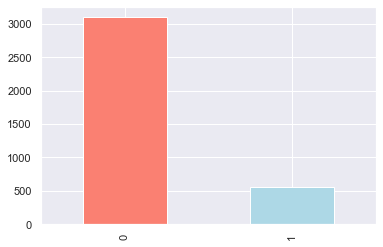

In [15]:
data.TenYearCHD.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [17]:
print("Ratio of Target Values  :",data["TenYearCHD"].value_counts()[1]/data["TenYearCHD"].value_counts()[0])
#print("\n")
#print("Prediction of Cardio Vascular Disease\n_____________________________________")
#data_eda["TenYearCHD"].value_counts()

Ratio of Target Values  : 0.1797353985156502


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [19]:
pd.set_option("display.float", "{:.2f}".format)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sex,3656.00,0.44,0.50,0.00,0.00,0.00,1.00,1.00
age,3656.00,49.56,8.56,32.00,42.00,49.00,56.00,70.00
education,3656.00,1.98,1.02,1.00,1.00,2.00,3.00,4.00
currentSmoker,3656.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00
cigsPerDay,3656.00,9.02,11.92,0.00,0.00,0.00,20.00,70.00
BPMeds,3656.00,0.03,0.17,0.00,0.00,0.00,0.00,1.00
prevalentStroke,3656.00,0.01,0.08,0.00,0.00,0.00,0.00,1.00
prevalentHyp,3656.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00
diabetes,3656.00,0.03,0.16,0.00,0.00,0.00,0.00,1.00
totChol,3656.00,236.87,44.10,113.00,206.00,234.00,263.25,600.00


In [20]:
data.nunique()

sex                   2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             241
sysBP               231
diaBP               142
BMI                1297
heartRate            72
glucose             138
TenYearCHD            2
dtype: int64

In [21]:
data['sex'].value_counts()

0    2034
1    1622
Name: sex, dtype: int64

In [23]:
data['education'].value_counts()

1.00    1526
2.00    1101
3.00     606
4.00     423
Name: education, dtype: int64

In [24]:
data['currentSmoker'].value_counts()

0    1868
1    1788
Name: currentSmoker, dtype: int64

In [25]:
data['BPMeds'].value_counts()

0.00    3545
1.00     111
Name: BPMeds, dtype: int64

In [26]:
data['prevalentStroke'].value_counts()

0    3635
1      21
Name: prevalentStroke, dtype: int64

In [27]:
data['prevalentHyp'].value_counts()

0    2517
1    1139
Name: prevalentHyp, dtype: int64

In [28]:
data['diabetes'].value_counts()

0    3557
1      99
Name: diabetes, dtype: int64

<AxesSubplot:title={'center':'Correlation with development of Coronary Heart Disease in 10 years time'}>

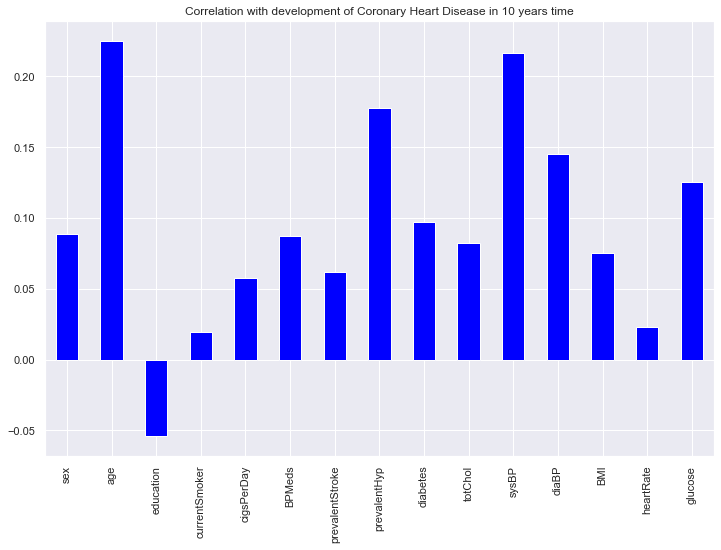

In [7]:
data.drop('TenYearCHD', axis=1).corrwith(data.TenYearCHD).plot(kind='bar', color = 'blue', grid=True, figsize=(12, 8), 
                                                  title="Correlation with development of Coronary Heart Disease in 10 years time")

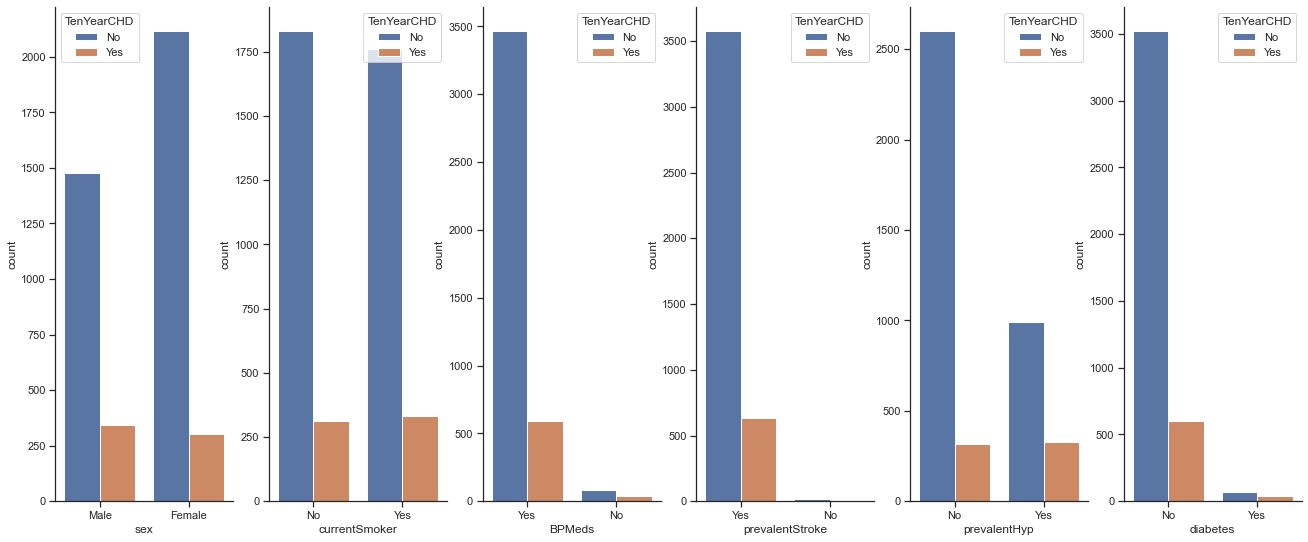

In [10]:
cat_features = ['sex','currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

plt.figure(figsize=(30, 20))
sns.set(font_scale= 1.0)
sns.set_style('ticks')

for i, feature in enumerate(cat_features):
    plt.subplot(2, 8, i+1)
    sns.countplot(data=data_eda, x=feature, hue='TenYearCHD')  
    
sns.despine()

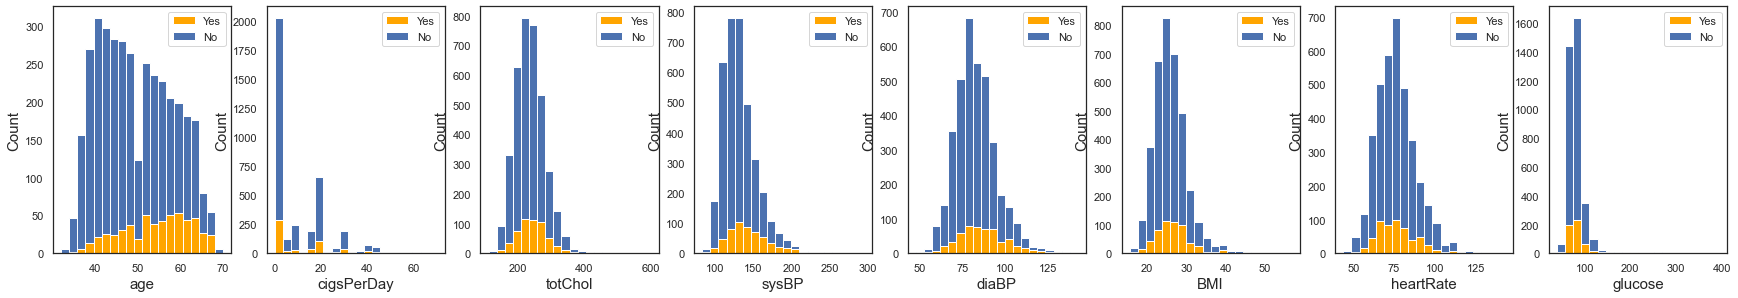

In [33]:
num_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP','BMI', 'heartRate', 'glucose']
sns.set_style('white')

plt.figure(figsize=(30, 10))
for i, feature in enumerate(num_features):
    plt.subplot(2, 8, i+1)
    plt.hist(x=[data[feature][data['TenYearCHD'] == 1], 
                data[feature][data['TenYearCHD'] == 0]],
             stacked=True, 
             label=['Yes', 'No'], 
             bins=20, 
             color=['orange', 'b'])
    plt.legend()
    plt.xlabel(f'{feature}', fontsize=15)
    plt.ylabel('Count', fontsize=15)

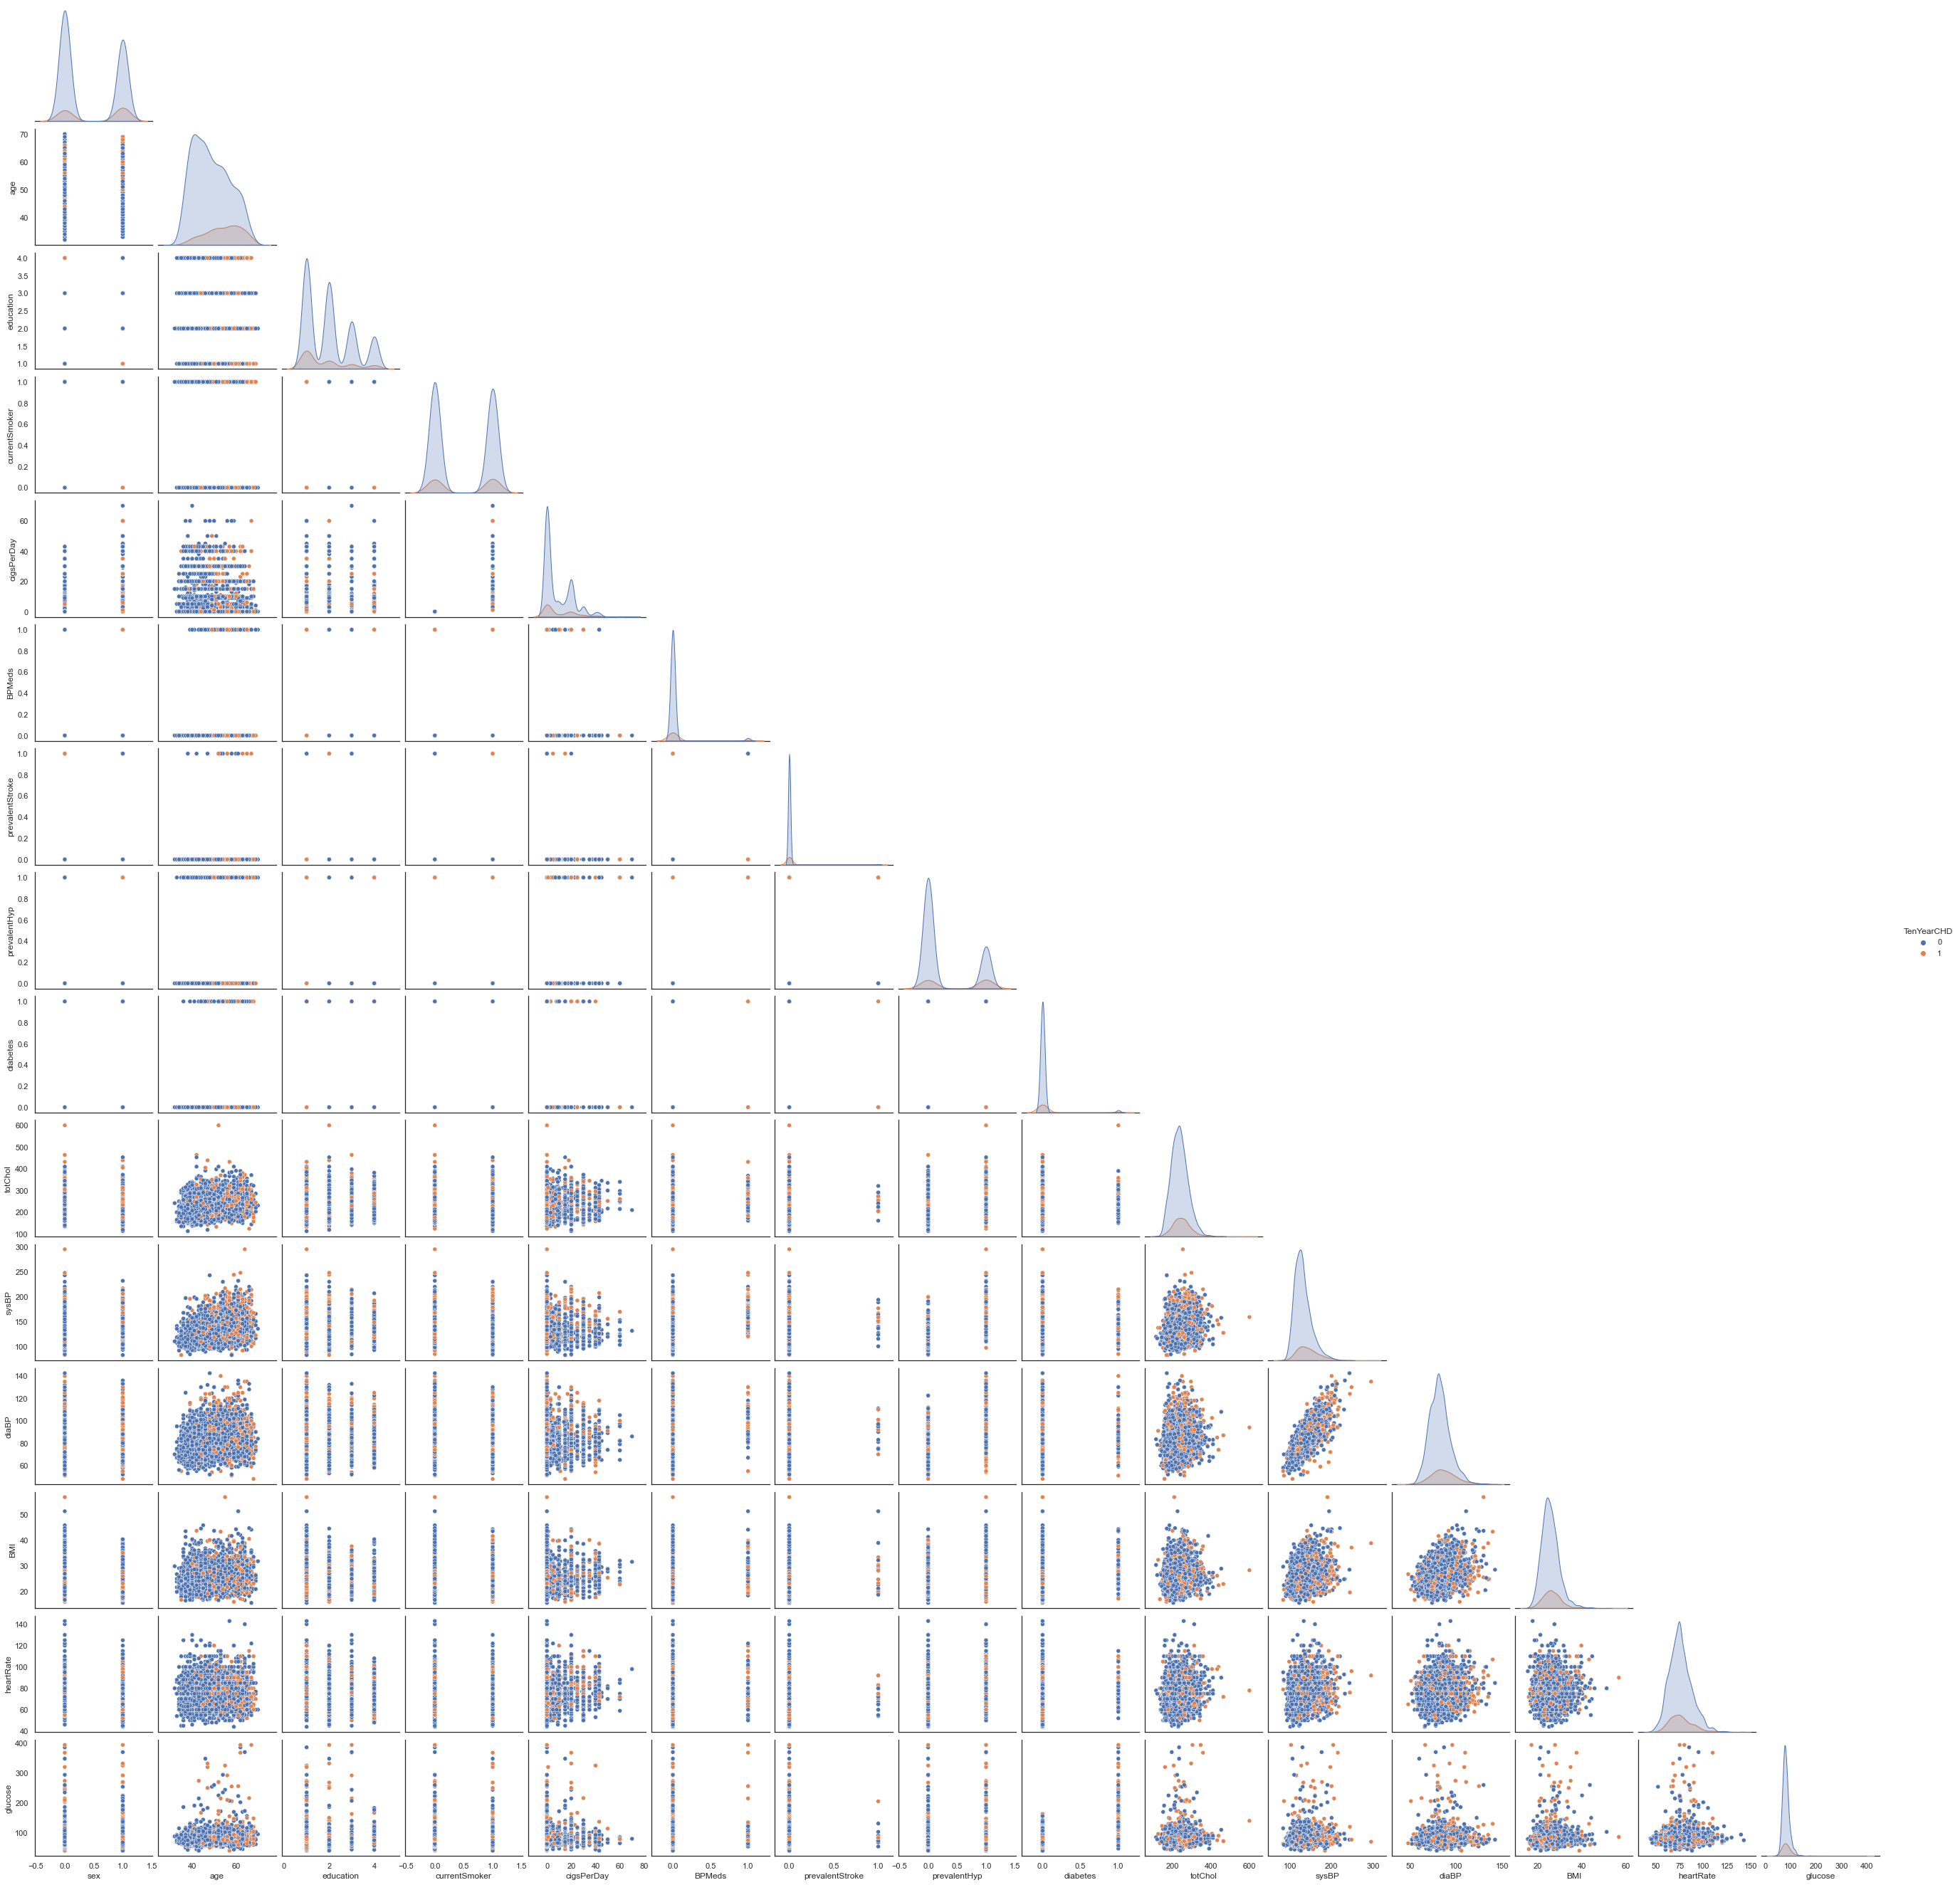

In [34]:
# Visualize correlations drilled down by dependent variable
_ = sns.pairplot(data, corner=True, hue='TenYearCHD')

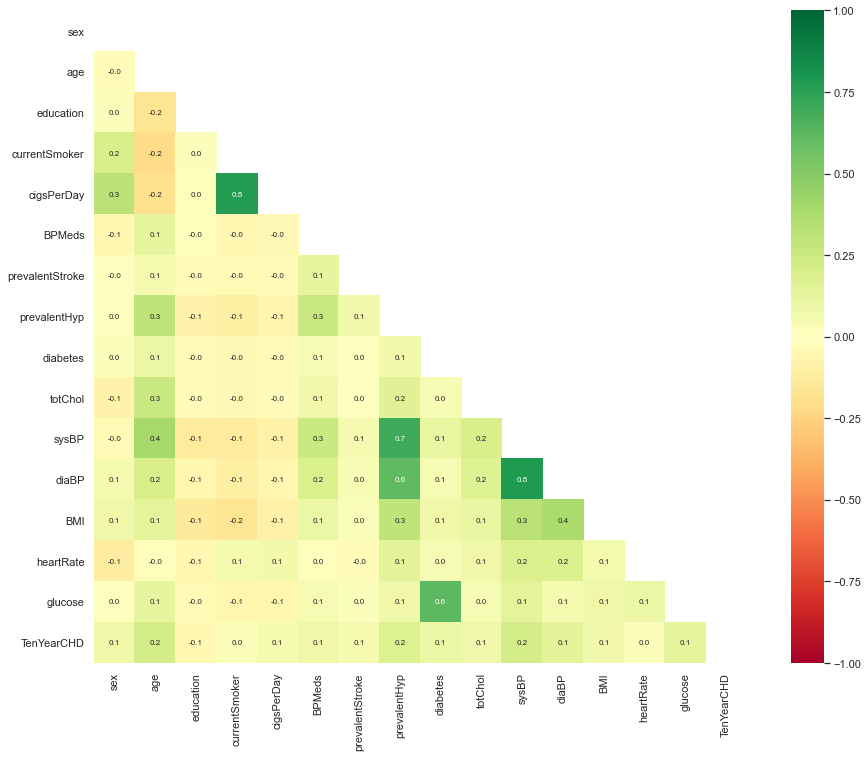

In [7]:
# correlation matrix heatmap visualization
sns.set(style="white")

# Generate a mask for the upper triangle
matrix = np.triu(data.corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(16,12))

# Plot the heatmap
_ = sns.heatmap(data.corr(), mask=matrix, annot=True, annot_kws={"size": 8}, square=True, 
                cmap='RdYlGn' , vmin=-1, vmax=1, fmt='.1f') 

In [36]:
data = pd.get_dummies(data, columns=['sex','currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes'])

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3656 non-null   int64  
 1   education          3656 non-null   float64
 2   cigsPerDay         3656 non-null   float64
 3   totChol            3656 non-null   float64
 4   sysBP              3656 non-null   float64
 5   diaBP              3656 non-null   float64
 6   BMI                3656 non-null   float64
 7   heartRate          3656 non-null   float64
 8   glucose            3656 non-null   float64
 9   TenYearCHD         3656 non-null   int64  
 10  sex_0              3656 non-null   uint8  
 11  sex_1              3656 non-null   uint8  
 12  currentSmoker_0    3656 non-null   uint8  
 13  currentSmoker_1    3656 non-null   uint8  
 14  BPMeds_0.0         3656 non-null   uint8  
 15  BPMeds_1.0         3656 non-null   uint8  
 16  prevalentStroke_0  3656 

In [38]:
data = data[[c for c in data if c not in ['TenYearCHD']] + ['TenYearCHD']]

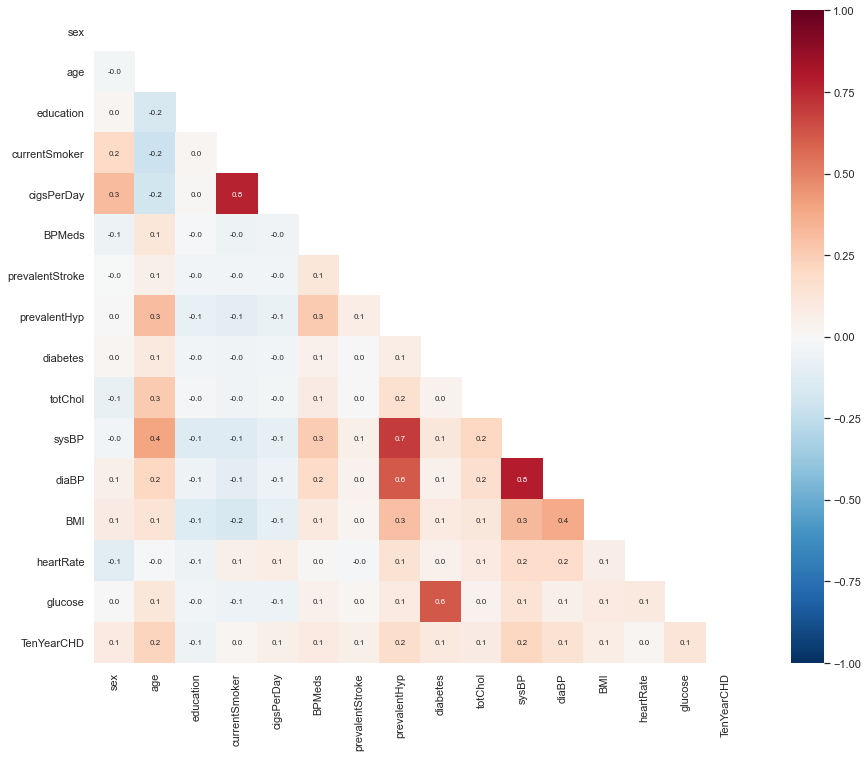

In [10]:
# correlation matrix heatmap visualization
sns.set(style="white")

# Generate a mask for the upper triangle
matrix = np.triu(data.corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(16,12))

# Plot the heatmap
_ = sns.heatmap(data.corr(), mask=matrix, annot=True, annot_kws={"size": 8}, square=True, 
                cmap='RdBu_r' , vmin=-1, vmax=1, fmt='.1f') 

In [40]:
X = data.drop(['TenYearCHD'], axis=1)
y = data['TenYearCHD']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

In [42]:
counter_Original=Counter(y_train)
print(counter_Original)

Counter({0: 2479, 1: 445})


In [43]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [45]:
counter = Counter(y_train_smote)
print(counter)

Counter({0: 2479, 1: 2479})


In [46]:
%%time
lr_baseline = LogisticRegression(random_state=SEED)
scores = cross_val_score(lr_baseline,
                         X_train_scaled,
                         y_train,
                         scoring='accuracy',
                         cv=5,
                         n_jobs=-1)

Wall time: 4.32 s


In [47]:
baseline_mean_score = scores.mean()
print("Baseline Model's score: {:.2f} (avg) {:.2f} (std)".format(scores.mean(), scores.std()))

Baseline Model's score: 0.85 (avg) 0.00 (std)


In [48]:
models = []
models.append(('LR', LogisticRegression(random_state=SEED)))
models.append(('SVM', SVC(random_state=SEED)))
models.append(('RF', RandomForestClassifier(random_state=SEED)))
models.append(('KNeighbor', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state = SEED)))
models.append(('GaussianNB', GaussianNB()))
models.append(('MLPClassifier', MLPClassifier(alpha=1, max_iter=1000)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

LR : Mean score 0.8516 (Std 0.0042)
SVM: Mean score 0.8468 (Std 0.0020)
RF : Mean score 0.8454 (Std 0.0063)
KNeighbor: Mean score 0.8376 (Std 0.0021)
DT : Mean score 0.7596 (Std 0.0151)
GaussianNB: Mean score 0.8263 (Std 0.0017)
MLPClassifier: Mean score 0.8458 (Std 0.0034)


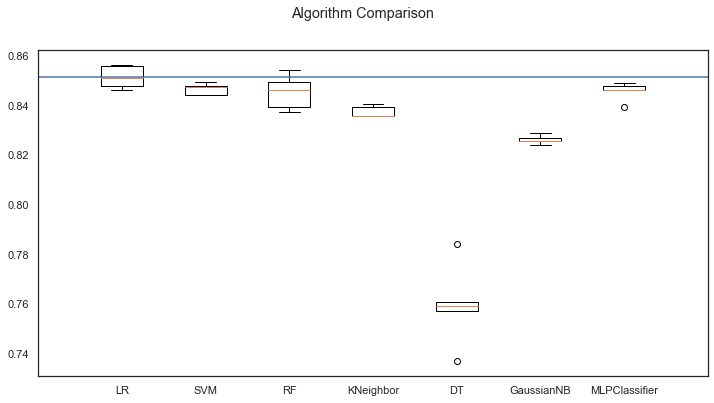

Wall time: 19.9 s


In [49]:
%%time
for name, model in models:
#     kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, 
                                 X_train_scaled, 
                                 y_train, 
                                 cv=5, 
                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "{:3}: Mean score {:.4f} (Std {:.4f})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(12,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

plt.plot([-10,20], [baseline_mean_score, baseline_mean_score])
plt.xlim(0, 8)
plt.show()

In [50]:
%%time
# Hyperparameter fine-tuning for MLPClassifier on multi-class dataset
#mlp = MLPClassifier(max_iter=100)
mlp = MLPClassifier (alpha=1, max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

#from sklearn.model_selection import GridSearchCV

MLPC_gs_clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
_ = MLPC_gs_clf.fit(X_train, y_train)

print(MLPC_gs_clf.best_estimator_)
print(MLPC_gs_clf.best_params_)
print(MLPC_gs_clf.best_score_)

MLPClassifier(alpha=0.05, learning_rate='adaptive', max_iter=1000, solver='sgd')
{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.8515709296407449
Wall time: 1min 57s


In [ ]:
#%%time
# Hyperparameter fine-tuning for Support Vector Machine on multi-class dataset
#parameters = {'C': np.logspace(-5, 2, 10),
#               'kernel' : ['linear', 'poly', 'rbf'],
#               'gamma' : ['scale', 'auto'],
#               'degree': [2, 3, 5]
#               }
    
#SVM_gs_clf = GridSearchCV(SVC(random_state=SEED),
#                      parameters, 
#                      cv=5,
#                      scoring='accuracy',
#                      n_jobs=-1)
#_ = SVM_gs_clf.fit(X_train_scaled, y_train)

#final_SVM_clf = SVM_gs_clf.best_estimator_

#print(SVM_gs_clf.best_estimator_)
#print(SVM_gs_clf.best_params_)
#print(SVM_gs_clf.best_score_)

In [51]:
%%time
# Hyperparameter fine-tuning for Logistic Regression on multi-class dataset
parameters = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': np.logspace(-5, 4, 10),
              'max_iter': [100, 300, 500]
              }
    
LR_gs_clf = GridSearchCV(LogisticRegression(random_state=SEED),
                      parameters, 
                      cv=5,
                      scoring='accuracy',
                      n_jobs=-1)
_ = LR_gs_clf.fit(X_train_scaled, y_train)

final_LR_clf = LR_gs_clf.best_estimator_

print(LR_gs_clf.best_estimator_)
print(LR_gs_clf.best_params_)
print(LR_gs_clf.best_score_)

LogisticRegression(C=0.01, random_state=41)
{'C': 0.01, 'max_iter': 100, 'penalty': 'l2'}
0.8543092143777076
Wall time: 2.05 s


In [52]:
y_pred = final_LR_clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

models.append({'Name': 'Logistic Regression',
               'Accuracy': accuracy,
               'Precision': precision,
               'Recall': recall,
               'F1 Score': f1score})

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       620
           1       0.62      0.09      0.16       112

    accuracy                           0.85       732
   macro avg       0.74      0.54      0.54       732
weighted avg       0.82      0.85      0.80       732



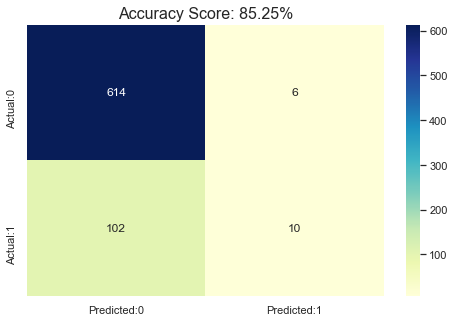

In [54]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap = 'YlGnBu')

# print the scores on training and test set
cm_title = 'Accuracy Score: {:.2%}'.format(accuracy)

_ = plt.title(cm_title, size = 16)

In [55]:
# Baseline model using Logistic Regression on imbalanced data set
lr = LogisticRegression()

scoring = {'accuracy': 'accuracy',
           'precision (class 0)': make_scorer(precision_score, average = None, labels = [0]), 
           'precision (class 1)': make_scorer(precision_score, average = None, labels = [1]),
           'recall (class 0)': make_scorer(recall_score, average = None, labels = [0]), 
           'recall (class 1)': make_scorer(recall_score, average = None, labels = [1])}

scores = cross_validate(lr, X_train, y_train, cv=5, scoring=scoring)

In [56]:
scores_to_print = list(scores.keys())[2:]
for k in scores_to_print:
    print('{:19}: {:.2%} (mean), {:.2%} (std)'.format(k.strip("test_"), scores[k].mean(), scores[k].std()))

accuracy           : 85.09% (mean), 0.36% (std)
precision (class 0): 85.61% (mean), 0.24% (std)
precision (class 1): 58.98% (mean), 11.38% (std)
recall (class 0)   : 99.07% (mean), 0.35% (std)
recall (class 1)   : 7.19% (mean), 1.83% (std)


In [58]:
# Oversample and plot imbalanced dataset with SMOTE
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train_smote)
print(counter)


Counter({0: 2479, 1: 2479})


In [59]:
# Baseline model using Logistic Regression on oversampled data set
lr_smote = LogisticRegression()

scoring = {'accuracy': 'accuracy',
           'precision (class 0)': make_scorer(precision_score, average = None, labels = [0]), 
           'precision (class 1)': make_scorer(precision_score, average = None, labels = [1]),
           'recall (class 0)': make_scorer(recall_score, average = None, labels = [0]), 
           'recall (class 1)': make_scorer(recall_score, average = None, labels = [1])}

scores = cross_validate(lr_smote, X_train_smote, y_train_smote, cv=5, scoring=scoring)

In [60]:
scores_to_print = list(scores.keys())[2:]
for k in scores_to_print:
    print('{:19}: {:.2%} (mean), {:.2%} (std)'.format(k.strip("test_"), scores[k].mean(), scores[k].std()))

accuracy           : 72.61% (mean), 3.44% (std)
precision (class 0): 73.29% (mean), 5.31% (std)
precision (class 1): 72.58% (mean), 1.80% (std)
recall (class 0)   : 72.57% (mean), 4.02% (std)
recall (class 1)   : 72.65% (mean), 9.58% (std)


In [61]:
# Using one trained instance to check whether model will generalise with testing data set
lr_smote.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [62]:
print(classification_report(y_test, lr_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78       620
           1       0.24      0.52      0.32       112

    accuracy                           0.67       732
   macro avg       0.56      0.61      0.55       732
weighted avg       0.79      0.67      0.71       732



In [63]:
# Oversample with SMOTE and random undersample for imbalanced dataset
# summarize class distribution
counter_rawdata = Counter(y_train)
print(counter_rawdata)

Counter({0: 2479, 1: 445})


In [73]:
# define pipeline
#over = SMOTE(sampling_strategy=0.1)
over = SMOTE(sampling_strategy=0.2)
#under = RandomUnderSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [74]:
# transform the dataset
X_train_mixed, y_train_mixed = pipeline.fit_resample(X_train, y_train)

In [75]:
# summarize the new class distribution
counter_mixeddata = Counter(y_train_mixed)
print(counter_mixeddata)

Counter({0: 618, 1: 495})


In [76]:
# Baseline model using Logistic Regression on rebalanced data set (oversample and undersample)
lr_mixed = LogisticRegression()

scoring = {'accuracy': 'accuracy',
           'precision (class 0)': make_scorer(precision_score, average = None, labels = [0]), 
           'precision (class 1)': make_scorer(precision_score, average = None, labels = [1]),
           'recall (class 0)': make_scorer(recall_score, average = None, labels = [0]), 
           'recall (class 1)': make_scorer(recall_score, average = None, labels = [1])}

scores = cross_validate(lr_mixed, X_train_mixed, y_train_mixed, cv=5, scoring=scoring)

In [77]:
scores_to_print_mixed = list(scores.keys())[2:]
for k in scores_to_print_mixed:
    print('{:19}: {:.2%} (mean), {:.2%} (std)'.format(k.strip("test_"), scores[k].mean(), scores[k].std()))

accuracy           : 67.39% (mean), 3.22% (std)
precision (class 0): 69.39% (mean), 2.16% (std)
precision (class 1): 64.87% (mean), 5.23% (std)
recall (class 0)   : 73.79% (mean), 5.75% (std)
recall (class 1)   : 59.39% (mean), 3.69% (std)


In [78]:
%%time
# Hyperparameter fine-tuning for Logistic Regression on multi-class dataset (MIXED SAMPLING TECHNIQUE)
parameters = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': np.logspace(-5, 4, 10),
              'max_iter': [100, 300, 500]
              }
    
lr_mixed_gs_clf = GridSearchCV(LogisticRegression(random_state=SEED),
                      parameters, 
                      cv=5,
                      scoring='accuracy',
                      n_jobs=-1)
_ = lr_mixed_gs_clf.fit(X_train_mixed, y_train_mixed)

lr_mixed_clf = lr_mixed_gs_clf.best_estimator_

print(lr_mixed_gs_clf.best_estimator_)
print(lr_mixed_gs_clf.best_params_)
print(lr_mixed_gs_clf.best_score_)

LogisticRegression(C=1e-05, max_iter=500, penalty='none', random_state=41)
{'C': 1e-05, 'max_iter': 500, 'penalty': 'none'}
0.6963802367389812
Wall time: 18 s


In [79]:
y_pred =lr_mixed_clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

models.append({'Name': 'Logistic Regression',
               'Accuracy': accuracy,
               'Precision': precision,
               'Recall': recall,
               'F1 Score': f1score})

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       620
           1       0.28      0.34      0.31       112

    accuracy                           0.77       732
   macro avg       0.58      0.59      0.58       732
weighted avg       0.78      0.77      0.77       732



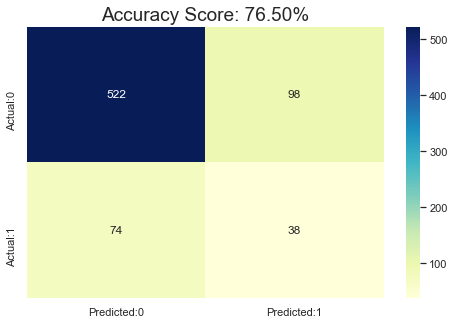

In [80]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap = 'YlGnBu')

# print the scores on training and test set
cm_title = 'Accuracy Score: {:.2%}'.format(accuracy)

_ = plt.title(cm_title, size = 19)

In [81]:
%%time
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=SEED)
rf.fit(X_train_scaled, y_train)

Wall time: 490 ms


RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=41)

In [82]:
feature_importance = np.array(rf.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)

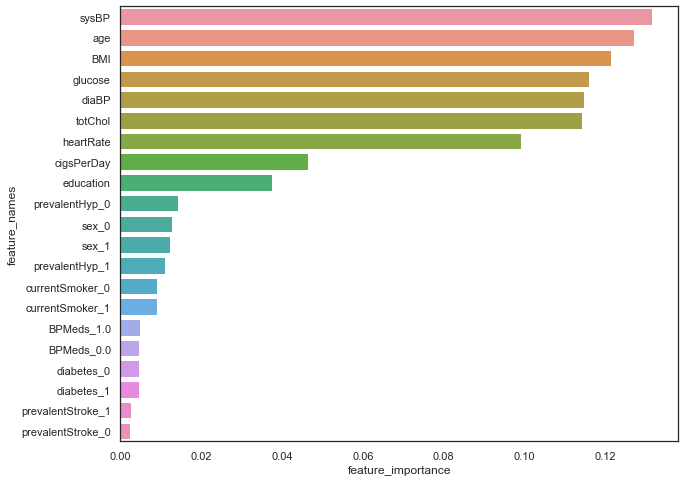

In [83]:
plt.figure(figsize=(10,8))
_ = sns.barplot(x=feat_imp_sorted['feature_importance'], y=feat_imp_sorted['feature_names'])